# ElectroStatic Potential Field

## Units

- Distance: $Å$
- Charge: $e$
- Dipole: $eÅ$ or $D=0.2081943 \; eÅ$
- Potential: $V$
- Potential / Coulomb constant: $e/Å$

## Imports

In [1]:
%matplotlib widget

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import sys
sys.path.append('../src/')
import constants
from read import *
from espf import *
from vdwsurface import vdw_surface

## Read and check input

In [2]:
Zs, pos = read_coordinates("input.bas")
print(Zs)
print(pos)

[8 1 1]
[[ 0.      0.      0.1224]
 [ 0.      0.7654 -0.4895]
 [ 0.     -0.7654 -0.4895]]


In [3]:
symbols, q4s = read_charges("PCHARGES_IN")
print(symbols)
print(q4s)
symbols, q7s = read_charges("PCHARGES_OUT")
print(symbols)
print(q7s)

['O' 'H' 'H']
[-0.23264816  0.11632376  0.11632376]
['O' 'H' 'H']
[-0.56760704  0.28380321  0.28380321]


In [4]:
print(compute_dipole(pos, q4s))
print(compute_dipole(pos, q7s))

[ 0.00000000e+00 -7.26307646e-09 -6.83770397e-01]
[ 0.00000000e+00  8.24920480e-09 -1.66824184e+00]


In [5]:
symbols, intradips, resdips, totaldips = read_dipoles("dipoles.out")
print(symbols)
print(intradips)
print(resdips)
print(totaldips)

['O' 'H' 'H']
[[-0.      0.      0.3129]
 [-0.     -0.      0.    ]
 [-0.      0.      0.    ]]
[[ 0.      0.     -0.6487]
 [ 0.     -0.2593 -0.3243]
 [ 0.      0.2593 -0.3243]]
[[-0.      0.     -0.3358]
 [ 0.     -0.2593 -0.3243]
 [ 0.      0.2593 -0.3243]]


In [6]:
Npoints, origin, lvs, vhartree1d, vhartree3d = read_xsf("vhartree.xsf")
Npoints, origin, lvs, vden1d, vden3d = read_xsf("fftpot.xsf")
Npoints, origin, lvs, vna1d, vna3d = read_xsf("vna.xsf")
grid1d, grid3d = generate_grid(Npoints, origin, lvs)
print(Npoints)
print(lvs)

[79 79 79]
[[40.  0.  0.]
 [ 0. 40.  0.]
 [ 0.  0. 40.]]


## Along 1D axis

(-65.0, 95.0)

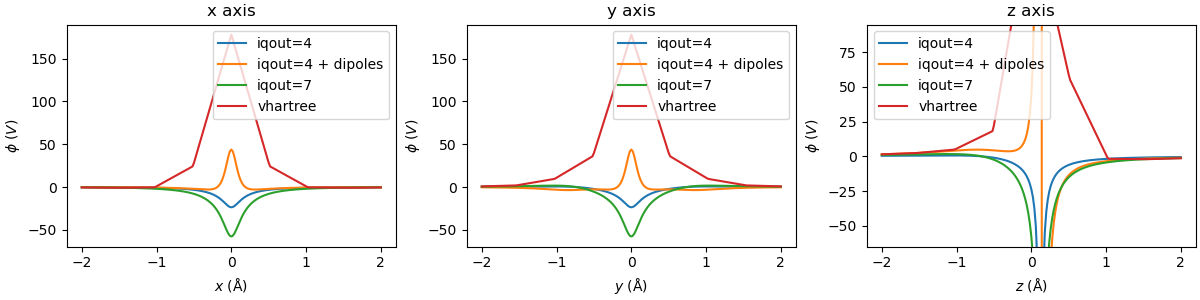

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), layout='constrained')

xs = np.linspace(-2, 2, 201)
rs = np.array([np.array([x, 0, 0]) for x in xs])
axs[0].plot(rs[:, 0], pointcharges_espf(pos, q4s, rs), label="iqout=4")
axs[0].plot(rs[:, 0], pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), label="iqout=4 + dipoles")
axs[0].plot(rs[:, 0], pointcharges_espf(pos, q7s, rs), label="iqout=7")
axs[0].plot(rs[:, 0], interpolate_espf(grid3d, vhartree3d, rs), label="vhartree")
axs[0].set_title("x axis")
axs[0].set_xlabel("$x$ (Å)")
axs[0].set_ylabel("$\phi$ ($V$)")
axs[0].legend()

ys = np.linspace(-2, 2, 201)
rs = np.array([np.array([0, y, 0]) for y in ys])
axs[1].plot(rs[:, 1], pointcharges_espf(pos, q4s, rs), label="iqout=4")
axs[1].plot(rs[:, 1], pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), label="iqout=4 + dipoles")
axs[1].plot(rs[:, 1], pointcharges_espf(pos, q7s, rs), label="iqout=7")
axs[1].plot(rs[:, 1], interpolate_espf(grid3d, vhartree3d, rs), label="vhartree")
axs[1].set_title("y axis")
axs[1].set_xlabel("$y$ (Å)")
axs[1].set_ylabel("$\phi$ ($V$)")
axs[1].legend()

zs = np.linspace(-2, 2, 201)
rs = np.array([np.array([0, 0, z]) for z in zs])
axs[2].plot(rs[:, 2], pointcharges_espf(pos, q4s, rs), label="iqout=4")
axs[2].plot(rs[:, 2], pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), label="iqout=4 + dipoles")
axs[2].plot(rs[:, 2], pointcharges_espf(pos, q7s, rs), label="iqout=7")
axs[2].plot(rs[:, 2], interpolate_espf(grid3d, vhartree3d, rs), label="vhartree")
axs[2].set_title("z axis")
axs[2].set_xlabel("$z$ (Å)")
axs[2].set_ylabel("$\phi$ ($V$)")
axs[2].legend()
axs[2].set_ylim(-65, 95)

## On 2D plane

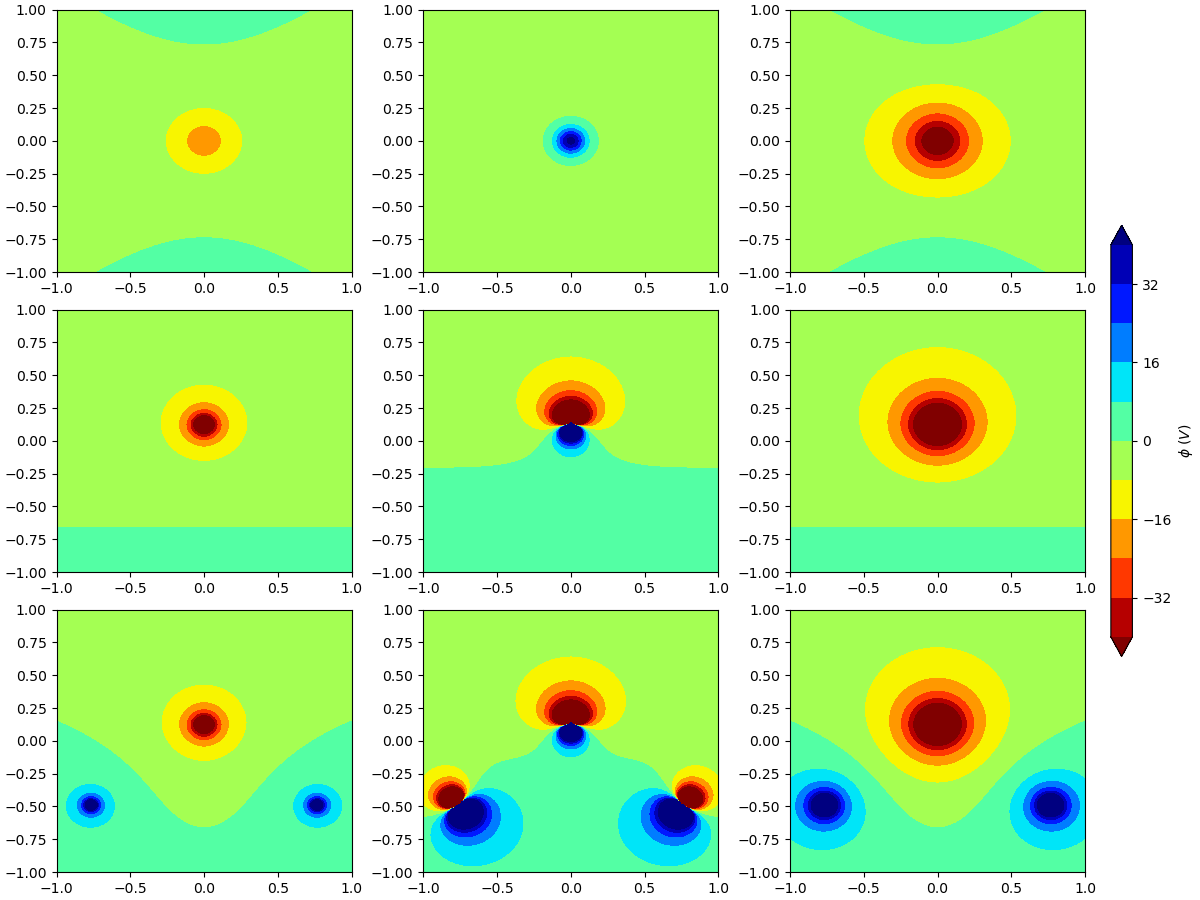

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(12, 9), layout='constrained')
levels = np.linspace(-40, 40, 11)

xs = np.linspace(-1, 1, 101)
ys = np.linspace(-1, 1, 101)
rs = np.array([np.array([x, y, 0]) for y in ys for x in xs])
axs[0, 0].contourf(xs, ys, np.reshape(pointcharges_espf(pos, q4s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[0, 1].contourf(xs, ys, np.reshape(pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[0, 2].contourf(xs, ys, np.reshape(pointcharges_espf(pos, q7s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')

xs = np.linspace(-1, 1, 101)
zs = np.linspace(-1, 1, 101)
rs = np.array([np.array([x, 0, z]) for z in zs for x in xs])
axs[1, 0].contourf(xs, zs, np.reshape(pointcharges_espf(pos, q4s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[1, 1].contourf(xs, zs, np.reshape(pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[1, 2].contourf(xs, zs, np.reshape(pointcharges_espf(pos, q7s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')

ys = np.linspace(-1, 1, 101)
zs = np.linspace(-1, 1, 101)
rs = np.array([np.array([0, y, z]) for z in zs for y in ys])
axs[2, 0].contourf(ys, zs, np.reshape(pointcharges_espf(pos, q4s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[2, 1].contourf(ys, zs, np.reshape(pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
cf = axs[2, 2].contourf(ys, zs, np.reshape(pointcharges_espf(pos, q7s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')

fig.colorbar(cf, ax=axs[:, 2], shrink=0.5, label="$\phi$ ($V$)")

## In 3D space

In [9]:
points, mesh = vdw_surface(pos, symbols, density=100, scale_factor=1.0) # 1.4, 1.6, 1.8, and 2.0.
points_4layers = np.concatenate((vdw_surface(pos, symbols, density=100, scale_factor=1.4)[0], vdw_surface(pos, symbols, density=100, scale_factor=1.6)[0], vdw_surface(pos, symbols, density=100, scale_factor=1.8)[0], vdw_surface(pos, symbols, density=100, scale_factor=2.0)[0]))

[-0.64546271  0.32273136  0.32273135]


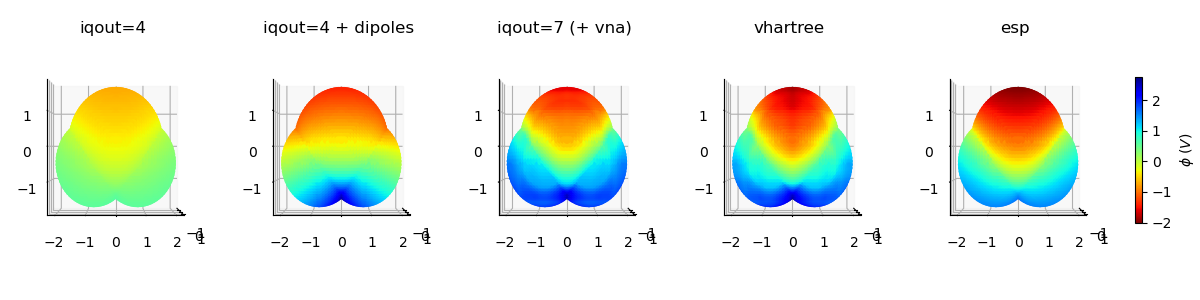

In [10]:
fig = plt.figure(figsize=(12, 3), layout='constrained')

espf0 = pointcharges_espf(pos, q4s, points)
espf1 = (pointcharges_espf(pos, q4s, points) + dipoles_espf(pos, totaldips, points))
espf2 = pointcharges_espf(pos, q7s, points) + interpolate_espf(grid3d, vna3d, points)
espf3 = interpolate_espf(grid3d, vhartree3d, points)

espf3_4layers = interpolate_espf(grid3d, vhartree3d, points_4layers)
qesps = compute_espcharges(pos, points_4layers, espf3_4layers)
print(qesps)

espf4 = pointcharges_espf(pos, qesps, points)
espfs = np.concatenate([espf0, espf1, espf2, espf3, espf4])
min, max = espfs.min(), espfs.max()
norm = plt.Normalize(min, max)

axs0 = fig.add_subplot(1, 5, 1, projection='3d')
axs0.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf0, cmap=mpl.cm.jet_r, norm=norm)
axs0.set_title("iqout=4")
axs0.set_box_aspect([1,1,1])
axs0.view_init(0, 0, 0)

axs1 = fig.add_subplot(1, 5, 2, projection='3d')
axs1.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf1, cmap=mpl.cm.jet_r, norm=norm)
axs1.set_title("iqout=4 + dipoles")
axs1.set_box_aspect([1,1,1])
axs1.view_init(0, 0, 0)

axs2 = fig.add_subplot(1, 5, 3, projection='3d')
axs2.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf2, cmap=mpl.cm.jet_r, norm=norm)
axs2.set_title("iqout=7 (+ vna)")
axs2.set_box_aspect([1,1,1])
axs2.view_init(0, 0, 0)

axs3 = fig.add_subplot(1, 5, 4, projection='3d')
axs3.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf3, cmap=mpl.cm.jet_r, norm=norm)
axs3.set_title("vhartree")
axs3.set_box_aspect([1,1,1])
axs3.view_init(0, 0, 0)

axs4 = fig.add_subplot(1, 5, 5, projection='3d')
s = axs4.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf4, cmap=mpl.cm.jet_r, norm=norm)
axs4.set_title("esp")
axs4.set_box_aspect([1,1,1])
axs4.view_init(0, 0, 0)

fig.colorbar(s, shrink=0.5, label="$\phi$ ($V$)")

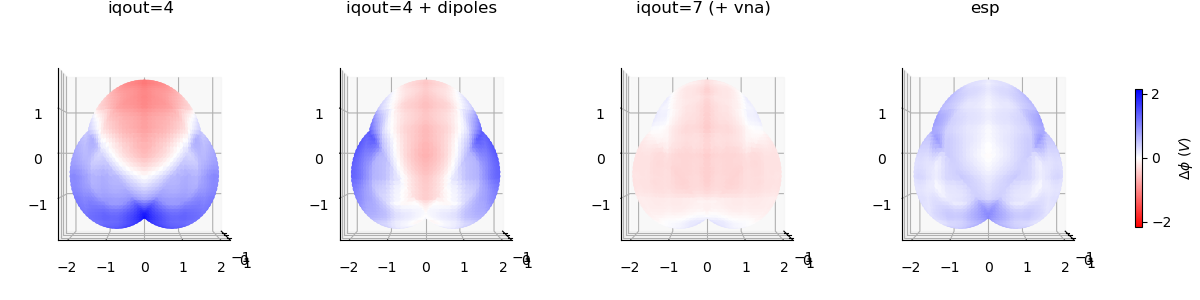

In [11]:
fig = plt.figure(figsize=(12, 3), layout='constrained')

espfs = np.concatenate([espf3-espf0, espf3-espf1, espf3-espf2])
min, max = -np.absolute(espfs).max(), np.absolute(espfs).max()
norm = plt.Normalize(min, max)

axs0 = fig.add_subplot(1, 4, 1, projection='3d')
axs0.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf3-espf0, cmap=mpl.cm.bwr_r, norm=norm)
axs0.set_title("iqout=4")
axs0.set_box_aspect([1,1,1])
axs0.view_init(0, 0, 0)

axs1 = fig.add_subplot(1, 4, 2, projection='3d')
axs1.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf3-espf1, cmap=mpl.cm.bwr_r, norm=norm)
axs1.set_title("iqout=4 + dipoles")
axs1.set_box_aspect([1,1,1])
axs1.view_init(0, 0, 0)

axs2 = fig.add_subplot(1, 4, 3, projection='3d')
axs2.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf3-espf2, cmap=mpl.cm.bwr_r, norm=norm)
axs2.set_title("iqout=7 (+ vna)")
axs2.set_box_aspect([1,1,1])
axs2.view_init(0, 0, 0)

axs3 = fig.add_subplot(1, 4, 4, projection='3d')
s = axs3.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf3-espf4, cmap=mpl.cm.bwr_r, norm=norm)
axs3.set_title("esp")
axs3.set_box_aspect([1,1,1])
axs3.view_init(0, 0, 0)

fig.colorbar(s, shrink=0.5, label="$\Delta\phi$ ($V$)")

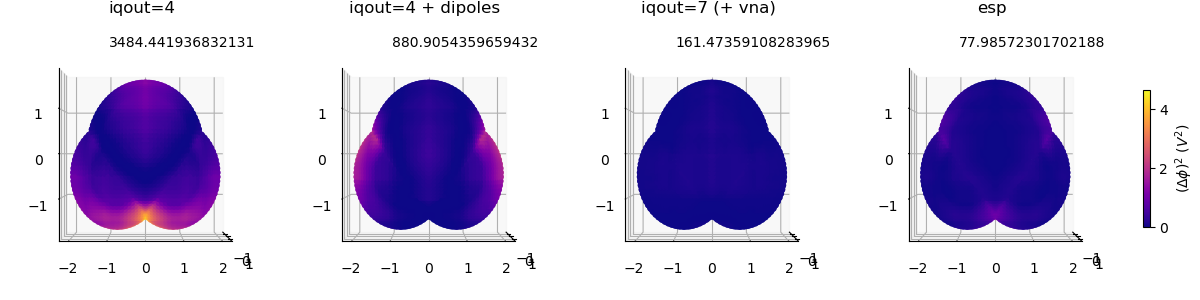

In [12]:
fig = plt.figure(figsize=(12, 3), layout='constrained')

espf0_4layers = pointcharges_espf(pos, q4s, points_4layers)
espf1_4layers = (pointcharges_espf(pos, q4s, points_4layers) + dipoles_espf(pos, totaldips, points_4layers))
espf2_4layers = pointcharges_espf(pos, q7s, points_4layers) + interpolate_espf(grid3d, vna3d, points_4layers)
espf4_4layers = pointcharges_espf(pos, qesps, points_4layers)

espfs = np.concatenate([(espf3-espf0)**2, (espf3-espf1)**2, (espf3-espf2)**2])
min, max = 0, np.absolute(espfs).max()
norm = plt.Normalize(min, max)

axs0 = fig.add_subplot(1, 4, 1, projection='3d')
axs0.scatter(points[:, 0], points[:, 1], points[:, 2], c=(espf3-espf0)**2, cmap=mpl.cm.plasma, norm=norm)
axs0.text(0, -1, 2.5, np.sum((espf3_4layers-espf0_4layers)**2))
axs0.set_title("iqout=4")
axs0.set_box_aspect([1,1,1])
axs0.view_init(0, 0, 0)

axs1 = fig.add_subplot(1, 4, 2, projection='3d')
axs1.scatter(points[:, 0], points[:, 1], points[:, 2], c=(espf3-espf1)**2, cmap=mpl.cm.plasma, norm=norm)
axs1.text(0, -1, 2.5, np.sum((espf3_4layers-espf1_4layers)**2))
axs1.set_title("iqout=4 + dipoles")
axs1.set_box_aspect([1,1,1])
axs1.view_init(0, 0, 0)

axs2 = fig.add_subplot(1, 4, 3, projection='3d')
axs2.scatter(points[:, 0], points[:, 1], points[:, 2], c=(espf3-espf2)**2, cmap=mpl.cm.plasma, norm=norm)
axs2.text(0, -1, 2.5, np.sum((espf3_4layers-espf2_4layers)**2))
axs2.set_title("iqout=7 (+ vna)")
axs2.set_box_aspect([1,1,1])
axs2.view_init(0, 0, 0)

axs3 = fig.add_subplot(1, 4, 4, projection='3d')
s = axs3.scatter(points[:, 0], points[:, 1], points[:, 2], c=(espf3-espf4)**2, cmap=mpl.cm.plasma, norm=norm)
axs3.text(0, -1, 2.5, np.sum((espf3_4layers-espf4_4layers)**2))
axs3.set_title("esp")
axs3.set_box_aspect([1,1,1])
axs3.view_init(0, 0, 0)

fig.colorbar(s, shrink=0.5, label="$(\Delta\phi)^2$ ($V^2$)")

## Dev testing